In [1]:
import sys

In [2]:
sys.path.append(r"D:\Pycharm_Projects")

In [68]:
from xgboost_loan_data.code.bank_loan_predict import XgboostModel, LogisticRegressionModel, prob_to_boolean

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
project_dir = r"D:\Pycharm_Projects\xgboost_loan_data"


In [6]:
print("Use Xgboost model")
M1 = XgboostModel(project_dir)
M1.prepare_data()
M1.fit_model()
prediction_model1 = M1.predict_with_test_data()


Use Xgboost model
Train size: 75.0%, Test size: 25.0%
Prediction Accuracy: 92.10%


In [9]:
print("Use Logistic model")
M2 = LogisticRegressionModel(project_dir)
#M2.remove_variable(["previous_loan_defaults_on_file","credit_score"])
M2.prepare_data()
M2.fit_model()
prediction_model2 = M2.predict_with_test_data()

Use Logistic model
using pandas's get_dummies function for categorical data
Train size: 75.0%, Test size: 25.0%


C:\Users\lukel\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction Accuracy: 79.30%


In [14]:
type(prediction_model2)

list

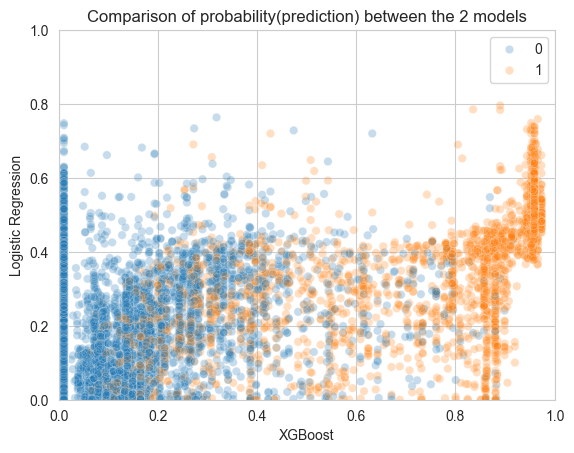

In [65]:
fig, ax = plt.subplots()
sns.scatterplot(x=prediction_model1,y=prediction_model2,
                alpha=0.25,
                hue=M1.test_data[1].iloc[:,0].tolist())
plt.xlabel("XGBoost")
plt.ylabel("Logistic Regression")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Comparison of probability(prediction) between the 2 models")


handles, labels = ax.get_legend_handles_labels()

plt.show()

In [71]:
M1_prediction = prob_to_boolean(prediction_model1)
M2_prediction = prob_to_boolean(prediction_model2)
y_test = M1.test_data[1].iloc[:,0].tolist()

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


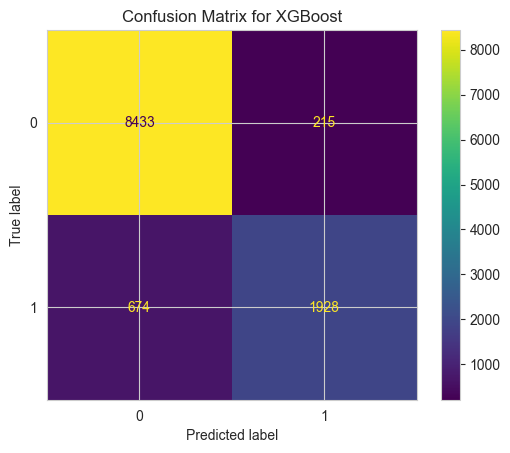

In [84]:
cfm_1 = confusion_matrix(y_true=y_test,y_pred=M1_prediction)
disp_cfm1 = ConfusionMatrixDisplay(confusion_matrix=cfm_1)

disp_cfm1.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()

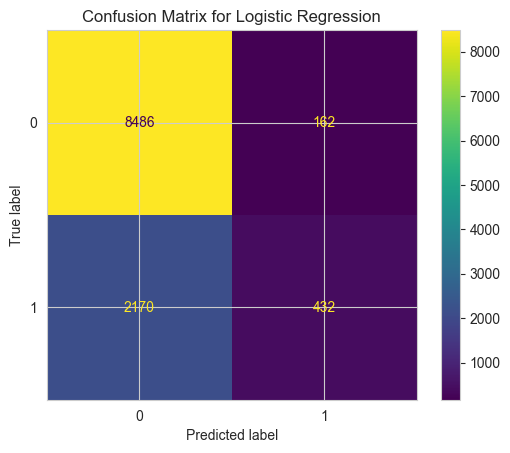

In [82]:
cfm_2 = confusion_matrix(y_true=y_test,y_pred=M2_prediction)
disp_cfm2 = ConfusionMatrixDisplay(confusion_matrix=cfm_2)

disp_cfm2.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

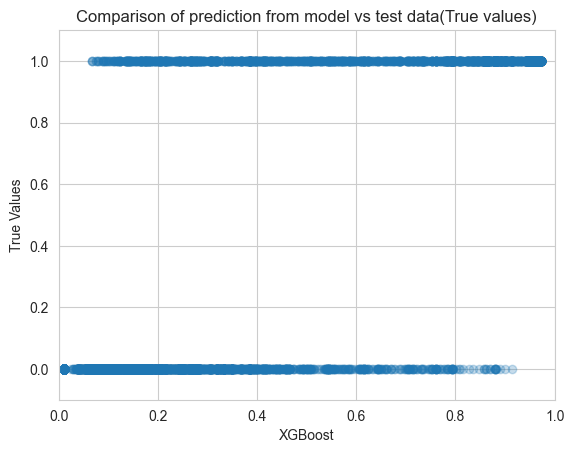

In [58]:
plt.figure()

plt.scatter(prediction_model1,M1.test_data[1].iloc[:,0].tolist(),alpha=0.25)
plt.xlabel("XGBoost")
plt.ylabel("True Values")
plt.xlim([0,1])
plt.ylim([-.1,1.1])
plt.title("Comparison of prediction from model vs test data(True values)")
plt.show()
# TODO: not a great visualization, need to replace

In [35]:
lg_coef = pd.DataFrame(M2.model.coef_,columns = M2.x.columns).T
lg_coef

,0
person_age,-2.329084e-07
person_income,-3.410975e-05
person_emp_exp,-3.553165e-08
loan_amnt,1.106860e-04
loan_int_rate,2.353641e-07
loan_percent_income,2.891175e-09
cb_person_cred_hist_length,-4.032210e-08
credit_score,-5.821416e-06
person_gender_female,-4.924985e-09
person_gender_male,-4.151054e-09


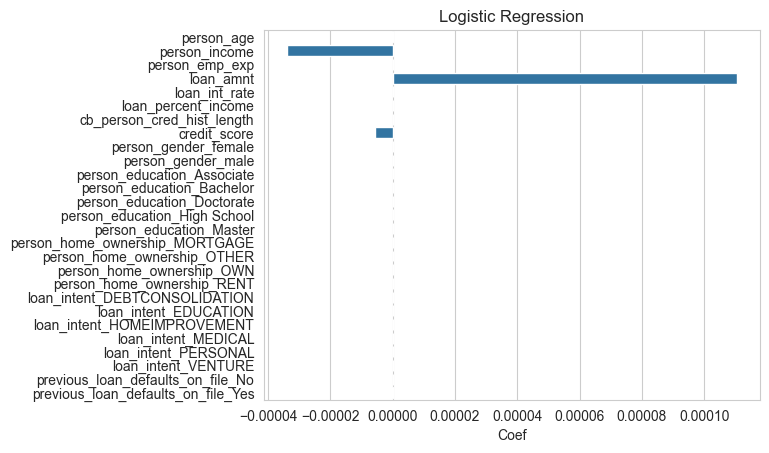

In [45]:
plt.figure()

sns.barplot(x=lg_coef.iloc[:,0].tolist(),y=lg_coef.index)
plt.ylabel(None)
plt.xlabel('Coef')
plt.title("Logistic Regression")
plt.show()

In [50]:
xgb_score = M1.model.get_score()
xgb_score = pd.DataFrame.from_dict(xgb_score.items())
xgb_score

,0,1
0,person_age,2.0
1,person_income,33.0
2,person_home_ownership,21.0
3,loan_amnt,1.0
4,loan_intent,20.0
5,loan_int_rate,26.0
6,loan_percent_income,24.0
7,cb_person_cred_hist_length,1.0
8,credit_score,10.0
9,previous_loan_defaults_on_file,10.0


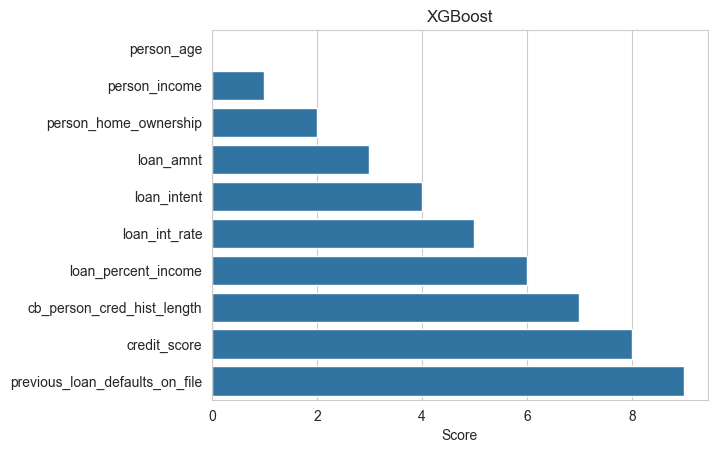

In [52]:
plt.figure()

sns.barplot(y=xgb_score.iloc[:,0].tolist(),x=xgb_score.index)
plt.ylabel(None)
plt.xlabel('Score')
plt.title("XGBoost")
plt.show()